# Ejercicio 2. Problema 25
### Un quiosquero vende periódicos a 1.10 euros cada uno. Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refleja en la tabla siguiente.

### Periódicos 30 40 50 60 70
### f(x) 20 % 25 % 25 % 20 % 10 %


## 1. La variable es determinada por el número de periodicos vendidos. 

## 2. La distribución se obtiene a partir de los datos historicos.  

## 3. La distribución enumerada es: 
### {0.20}, {0.20+0.25=0.45}, {0.45+0.25=0.70}, {0.70+0.20=0.90}, {0.90+ 0.10=1}
## F(x)= {0.20, 0.45, 0.70, 0.90, 1}

## 4. Intervalos generados:
## {0 a 0.19}, {0.20 a 0.44}, {0.45 a 0.69}, {0.70 a 0.89} {0.90 a 1}
    

## 5 Generación de números aleatorios $x_{1} \sim U(0,1)$ 

In [84]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [103]:
pedido=50 #cantidad de periódico solicitado.
puv=1.10 #Precio unitario de venta.
cua=0.90 #Costo unitario de adquisicón.
cur=0.10 # Costo unitario de reciclaje.
cvp=0.20 # Costo de venta perdida.
bp=0 # beneficio promedio.

In [104]:
def bene(): #La función bene es lo que nos dara el beneficio por un día.
    va=round(random.uniform(0, 1),4) #Regresa una v.a con distribución uniforme entre 0 y 1 redondeado a 4 digitos decimales.
    
    if 0<=va and va<0.20 :  #Se crea una lista de ciclo's if para generar la simulación de ventas de periodicos.
        ventassimu=30
      
    if 0.20<=va and va<0.45 :
        ventassimu=40
      
    if 0.45<=va and va<0.70 :
        ventassimu=50
      

    if 0.70<=va and va<0.90 :
        ventassimu=60
      

    if 0.90<=va and va<1 :
        ventassimu=70
      
    
    if pedido < ventassimu :
        ventasreales=pedido
        ventasperdidas=ventassimu-pedido
        periodicosnov=0
        

    if pedido >= ventassimu :
        ventasreales=ventassimu
        ventasperdidas=0
        periodicosnov=pedido-ventasreales
        
    #print("ventas simuladas:",ventassimu,"ventas reales:",ventasreales,"ventas perdidas:",ventasperdidas,"Periodicos no vendidos:",periodicosnov)
    Beneficio=(puv*ventasreales)-(cua*pedido)-(cur*periodicosnov)-(cvp*ventasperdidas)
    
    return Beneficio #Nos arroja el beneficio

In [105]:
bene() #beneficio por día

6.000000000000007

In [106]:
def proba(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", arroja el beneficio promedio
    bp = 0                       # seria la suma de los beneficios entre la cantidad de veces realizado la simulación. 
    for i in range(n):              
        bp= (bp + bene() )
        bpa=bp/(i+1)
        #print(i,"Beneficio promedio:",bpa)
        prob.append(round(bpa,5))    # Agregamos el beneficio promedio introducido a la lista
                    
    return prob

In [107]:
X = proba(1000)  #esto sería hacer un experimento.

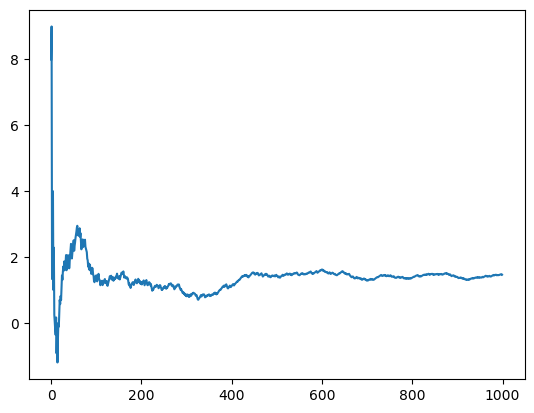

In [108]:
plt.plot(X)  

# El beneficio promedio al hacer una simulación en 1000 días es:

In [109]:
print(np.mean(X), np.std(X))

1.37516291 0.48534106565366164


## 6 Repetir el experimento $N$ veces. 

In [110]:
def beneficiodia(n): #con esta función se realiza la simulación de n veces el experimento.
    lista=[]
    for i in range(n):
        X = proba(1000)  
        s = np.mean(X)
        lista.append(np.mean(s))
    return lista


In [116]:
Y=beneficiodia(20)

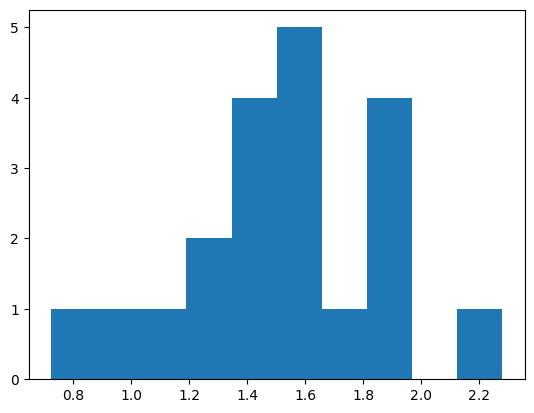

In [119]:
plt.hist(Y,bins=10)
plt.show()

# El beneficío promedio en hacer varias veces la simulación es decir la medía de medias es:

In [126]:
print("el beneficio promedio es:",np.mean(Y),"desviación estandar:", np.std(Y)) #El beneficio por día será aproximadamente de 1.58

el beneficio promedio es: 1.5330932050000001 desviación estandar: 0.3435250187376126


## 7 El intervalo de confianza:
    

In [127]:
li=np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50)
ls=np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)
if li <= np.mean(Y) <= ls:
    print(li, "<= Media:", np.mean(Y), "<=", ls) 
    print("Se acepta la hipótesis con un nivel de confiabilidad del 95%")
    

1.4378729278594122 <= Media: 1.5330932050000001 <= 1.628313482140588
Se acepta la hipótesis con un nivel de confiabilidad del 95%


## 8. El pedido de periodicos que maximiza la función tiene que ser un pedido entre 0 y 70, de la fución de beneficio promed,en vez de pedir 50 periodicos, ahora se convertira en una una función que arrojara el beneficio de pedir 0 periodicos hasta 70, se guardara en una lista y se obtendra el máximo.

(array([ 3.,  1.,  0.,  6.,  6.,  9., 10.,  8.,  6., 22.]),
 array([-15.6773155 , -13.69492982, -11.71254414,  -9.73015846,
         -7.74777278,  -5.7653871 ,  -3.78300142,  -1.80061574,
          0.18176994,   2.16415562,   4.1465413 ]),
 <BarContainer object of 10 artists>)

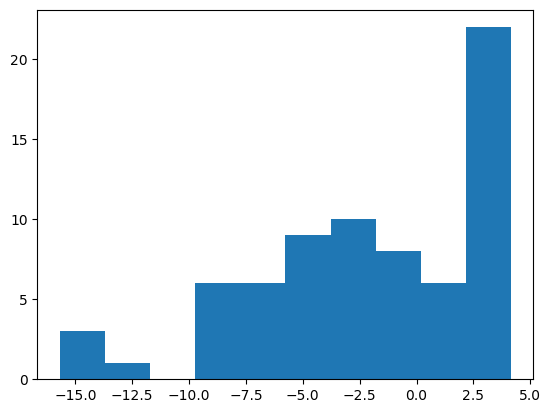

In [128]:
lista2=[] #Con está lista, se tendra el beneficio de pedir de 0 hasta 70 periodicos.
for i in range(71):
    pedido=i
    bene()
    X = proba(100)  
    w=np.mean(X)
    lista2.append(np.mean(w))
    
plt.hist(lista2) 

In [129]:
max_value = None 
for num in lista2:
    if (max_value is None or num > max_value): #La función max_value nos da el valor maximo de una lista.
        max_value = num

print("Pedir",i, "periodicos para obtener el maximo beneficio que es de:", max_value,)

Pedir 70 periodicos para obtener el maximo beneficio que es de: 4.146541299999999


# Solución analitica

## Al compilar el ejercicio muchas veces, note que solo existian 5 valores de beneficio, eso tiene justificación por los intervalos que tiene el problema que son 5, dependiendo de donde callera la variable aleatoria se generaba un beneficio

## Los beneficios en pedir 50 periodicos son $[-14,-2,10,8,6]$

## Con las distribuciones dadas esto puede ser: $20\%(-14)+ 25\%(-2) + (25\%)(10)+ 20\%(8)+ 10\%(6)=1.4 $ euros.   